In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/Faults.csv')
print(df.shape) #data size

(1941, 34)


In [320]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [321]:
#print(df.sample(10))

In [322]:
#print(df.info)

In [323]:
# print(df.isnull().sum()) #are there any missing values ?

In [324]:
# print(df.describe) #data insights

In [325]:
# print(df.duplicated().sum())

In [326]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("data/Faults.csv")

# Remove outliers
def outliars(data):
    for col in data.select_dtypes(include='number').columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_cleaned = outliars(df)

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

#Save to CSV
#df_standardized.to_csv("data/Faults_Standardized.csv", index=False)
# print(df_standardized.head())


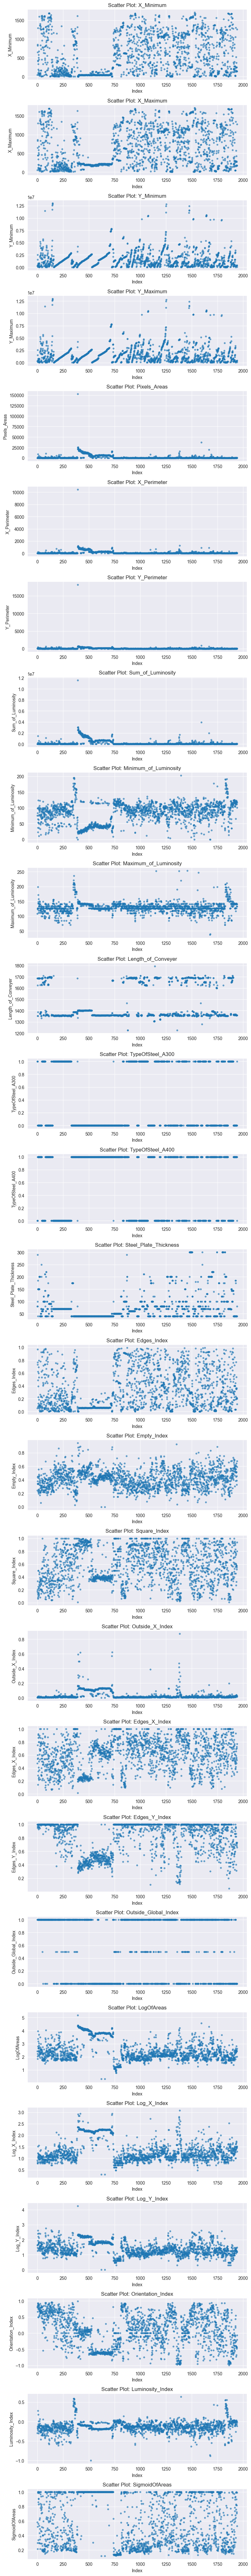

In [327]:
import matplotlib.pyplot as plt

# Select all features except the last 2 (e.g., fault labels)
df_features = df.iloc[:, :-7]

# Create scatter plots: feature value vs row index
fig, axs = plt.subplots(len(df_features.columns), 1, figsize=(8, 3 * len(df_features.columns)), dpi=100)

for i, col in enumerate(df_features.columns):
    axs[i].scatter(df_features.index, df_features[col], alpha=0.6, s=10)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Index')
    axs[i].set_title(f'Scatter Plot: {col}')

plt.tight_layout()
plt.show()


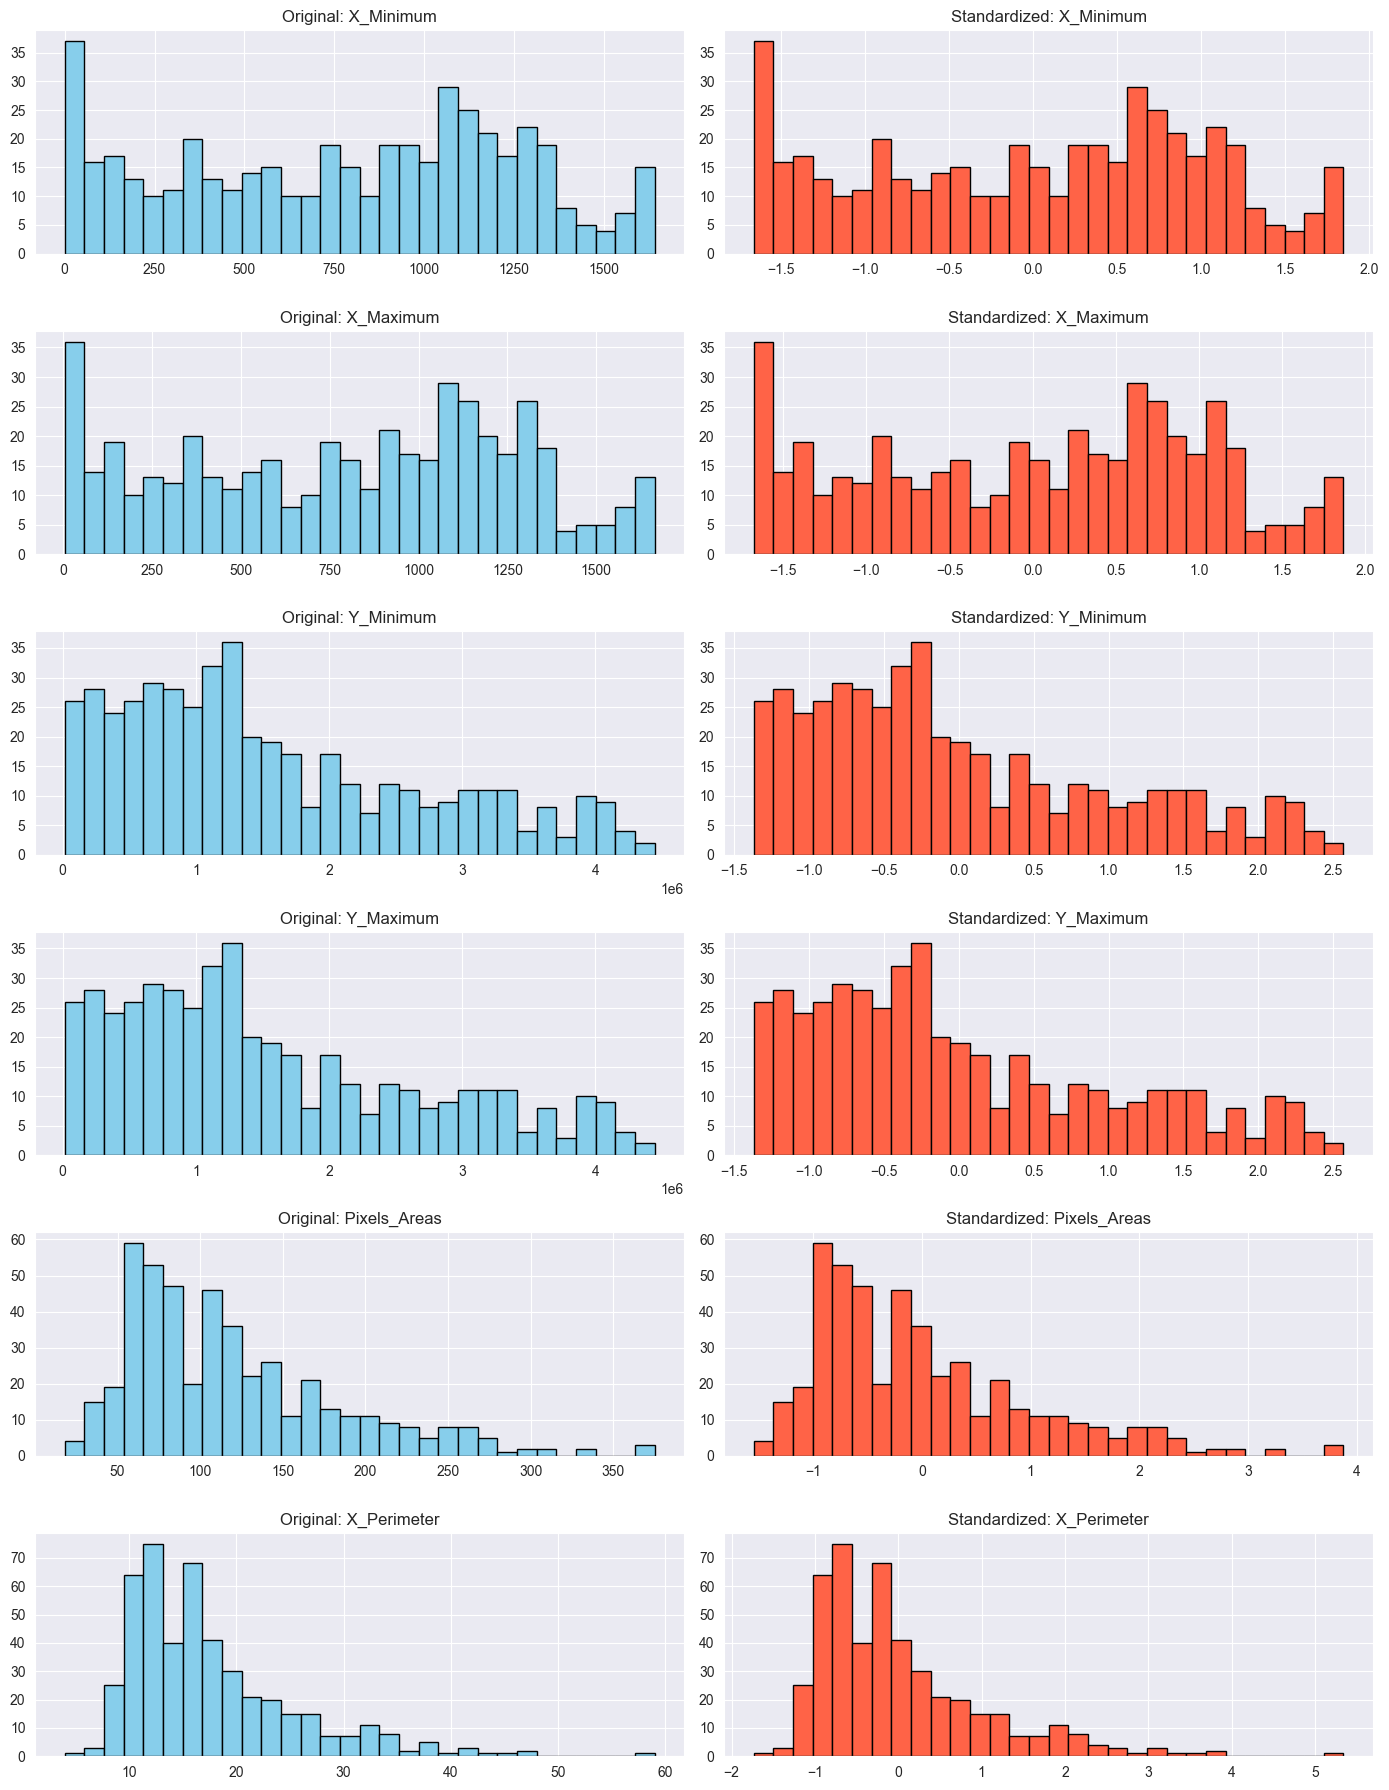

In [328]:
fig, axs = plt.subplots(6, 2, figsize=(14, 18))
colors = ['skyblue', 'tomato']

for i, col in enumerate(df_cleaned.columns[:6]):
    axs[i][0].hist(df_cleaned[col], bins=30, color=colors[0], edgecolor='black')
    axs[i][0].set_title(f"Original: {col}")

    axs[i][1].hist(df_standardized[col], bins=30, color=colors[1], edgecolor='black')
    axs[i][1].set_title(f"Standardized: {col}")

plt.tight_layout()
plt.show()

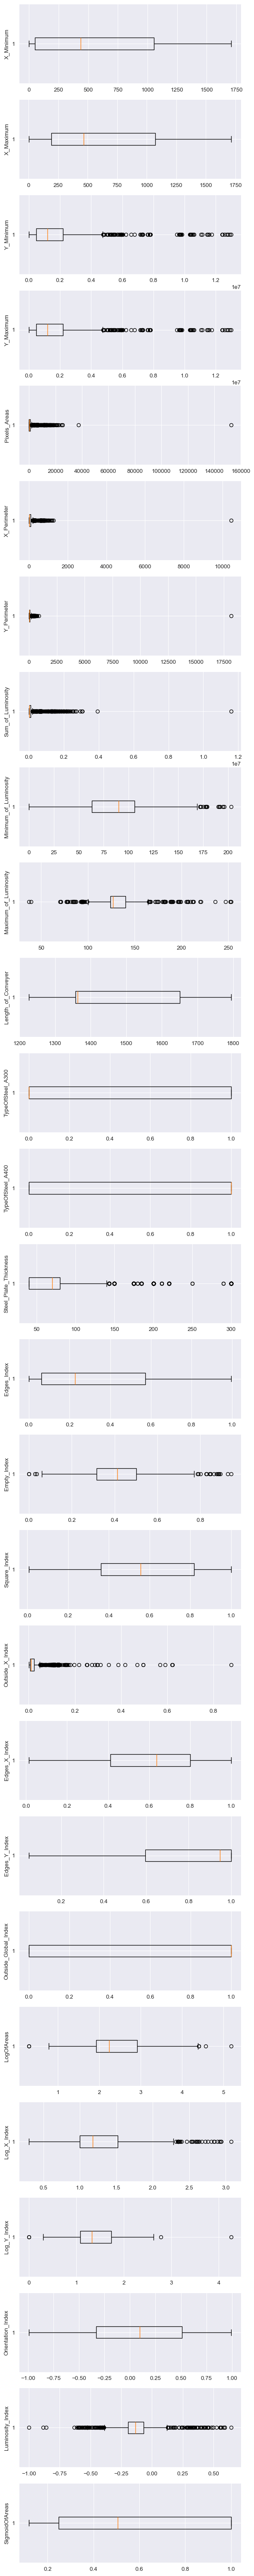

In [329]:
df_features = df.iloc[:,:-7]

fig, axs = plt.subplots(len(df_features.columns), 1, dpi=95, figsize=(7, 3 * len(df_features.columns)))

i = 0
for col in df_features.columns:
    axs[i].boxplot(df_features[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

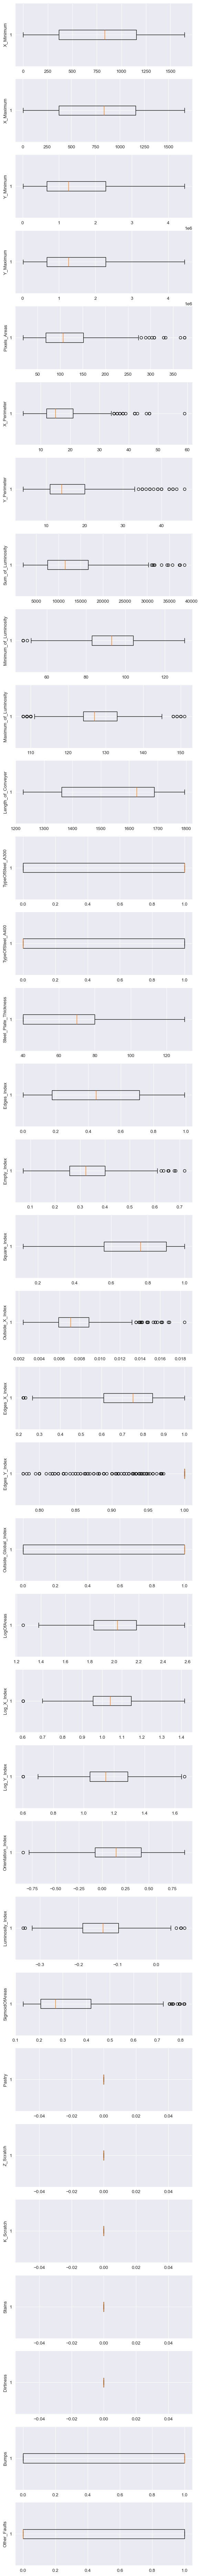

In [330]:
fig, axs = plt.subplots(len(df_cleaned.columns), 1, dpi=95, figsize=(7, 3 * len(df_cleaned.columns)))

i = 0
for col in df_cleaned.columns:
    axs[i].boxplot(df_cleaned[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [331]:
# #correlation
# corr = df.corr()
#
# plt.figure(figsize=(12, 10), dpi=120)
# sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 6})
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()


In [332]:
from sklearn.model_selection import cross_val_score
import numpy as np

def forward_selection(X, y, model, max_features=None):
    x_selected = []
    c_rate_best = -np.inf

    if max_features is None:
        max_features = X.shape[1]

    while len(x_selected) < max_features:
        x_selected_last_iter = list(x_selected)
        c_rate = []

        for j in range(X.shape[1]):
            if j not in x_selected:
                x_temp = x_selected + [j]
                scores = cross_val_score(model, X[:, x_temp], y, cv=5)
                c_rate.append(np.mean(scores))
            else:
                c_rate.append(-np.inf)

        x_best_addition = np.argmax(c_rate)

        if c_rate[x_best_addition] > c_rate_best:
            x_selected.append(x_best_addition)
            c_rate_best = c_rate[x_best_addition]
        else:
            break

    return x_selected


In [333]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('data/Faults.csv')

# Define features and label
X = df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])
y = df['Pastry']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for model accuracy check
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", round(accuracy * 100, 1), "%")

# Forward Selection function
def forward_selection(X, y, model, max_features=None):
    x_selected = []
    c_rate_best = -np.inf
    if max_features is None:
        max_features = X.shape[1]

    while len(x_selected) < max_features:
        c_rate = []
        for j in range(X.shape[1]):
            if j not in x_selected:
                x_temp = x_selected + [j]
                scores = cross_val_score(model, X[:, x_temp], y, cv=5)
                c_rate.append(np.mean(scores))
            else:
                c_rate.append(-np.inf)
        x_best_addition = np.argmax(c_rate)
        if c_rate[x_best_addition] > c_rate_best:
            x_selected.append(x_best_addition)
            c_rate_best = c_rate[x_best_addition]
        else:
            break
    return x_selected

# Apply forward selection
selected_features = forward_selection(X_scaled, y, model, max_features=3)
print("Selected feature indices:", selected_features)


Naive Bayes Accuracy: 69.7 %
Selected feature indices: [np.int64(0), np.int64(16), np.int64(23)]
